
## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries
import warnings

warnings.filterwarnings(action='ignore')

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# computational time
import time

import math

## 1. Load and plot the dataset (dataset-noise-02.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


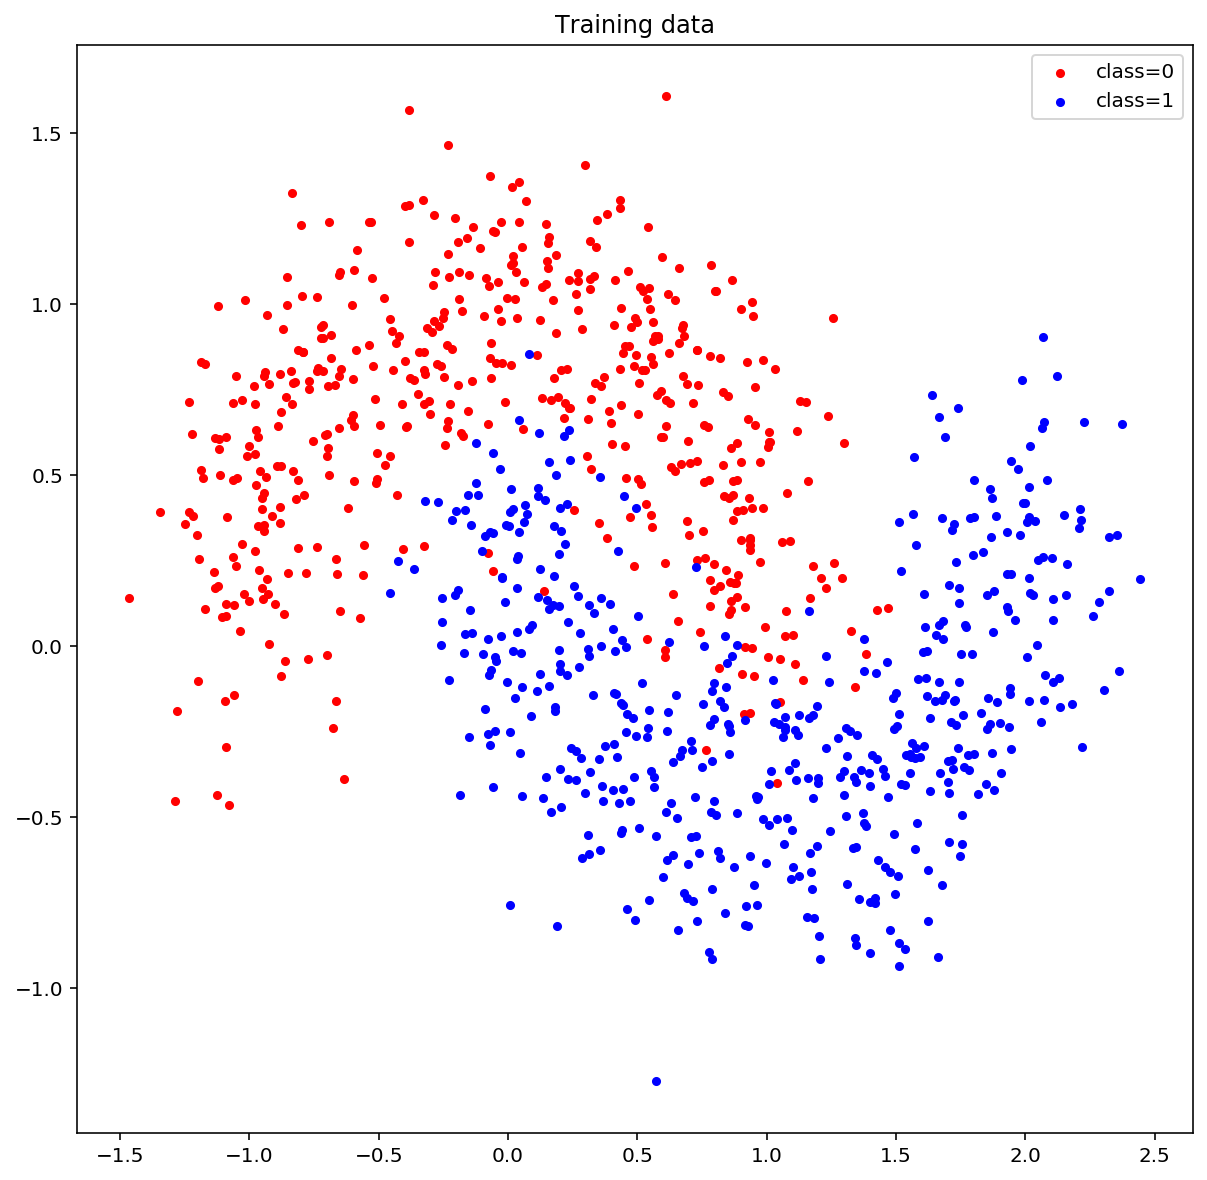

In [3]:
# import data with numpy
data = np.loadtxt('dataset-b.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0].reshape(data.shape[0], 1) # feature 1
x2 = data[:,1].reshape(data.shape[0], 1) # feature 2
idx = data[:,2].reshape(data.shape[0], 1) # label

idx_class0 = np.array([[x1[i], x2[i]] for i in range(len(idx)) if idx[i] == 0]) # index of class0
idx_class1 = np.array([[x1[i], x2[i]] for i in range(len(idx)) if idx[i] == 1]) # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(idx_class0[:,0], idx_class0[:,1] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(idx_class1[:,0], idx_class1[:,1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Define a logistic regression loss function and its gradient
<hr>

In [5]:
def sigmoid(z):
    
    return 1 / (1 + math.e ** -z)

# predictive function definition
def f_pred(X,w): 
    
    f = sigmoid(np.dot(X, w))
    
    return f 

# Test predicitive function 

def loss_logreg(z_pred,z): 
    n = len(z)
    loss = - (1/n) * np.sum(z * np.log(z_pred) + (1-z) * np.log(1-z_pred))    
    return loss

def grad_loss(z_pred,z,X):

    grad = np.dot(X.T, z_pred - z) / len(X) * 2
    
    return grad

# gradient descent function definition
def grad_desc(X, z, w_init,tau=0.01, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        z_pred = f_pred(X,w) # linear predicition function
        grad_f = grad_loss(z_pred, z, X) # gradient of the loss
        w = w - tau * grad_f
        L_iters[i] =  loss_logreg(z_pred, z)  # save the current loss value

        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

Time= 1.6535747051239014
nan
[[  3.69270542]
 [ -0.65332257]
 [ -5.28991769]
 [ -2.27201345]
 [-10.5720028 ]
 [ -0.36813866]
 [  1.91795644]
 [  6.91099231]
 [ -3.28049884]
 [  2.103617  ]]


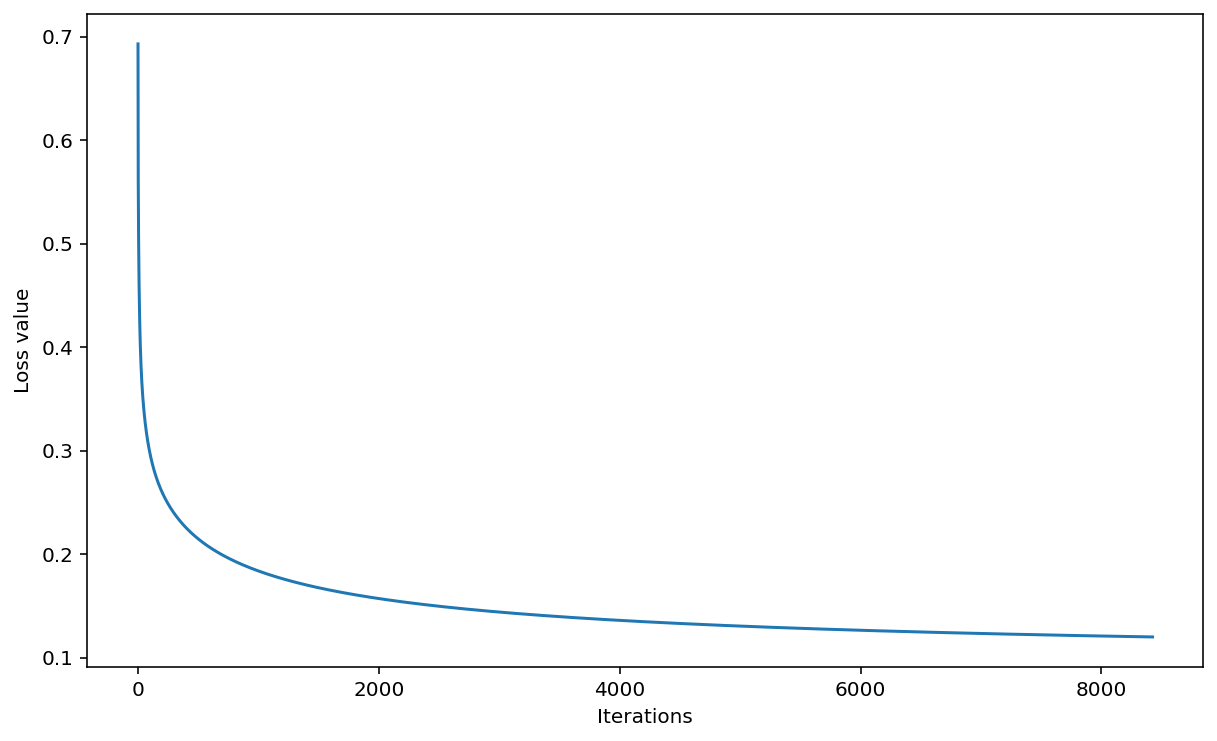

In [15]:
x1 = data[:,0].reshape(data.shape[0], 1)
x2 = data[:,1].reshape(data.shape[0], 1)
y = data[:,2].reshape(data.shape[0], 1)

# construct data matrix

n = data.shape[0]
X = np.ones([n,10]) 
for k in range(X.shape[1]):
    if k % 3 == 0:
        X[:,k] = [(x1[i] * x2[i]) ** (int(k/3)) for i in range(len(X[:,1]))]
    elif k %3 == 1:
        X[:,k] = [x1[i] ** (int(k/3) + 1) for i in range(len(X[:,1]))]
    else:
        X[:,k] = [x2[i] ** (int(k/3) + 1) for i in range(len(X[:,1]))]

# parameters vector
w = np.array([1,1,1,1,1,1,1,1,1,1])[:,None] # [:,None] adds a singleton dimension

# run gradient descent algorithm 
start = time.time()
w_init = np.array([0 for i in range(10)])[:,None]
tau = 1e-1; max_iter = 10000
w, L_iters = grad_desc(X, y, w_init, tau, max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)

# plot
plt.figure(3, figsize=(10,6))
plt.plot([i for i in range(len(L_iters))], L_iters) 
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decisoin boundary
<hr>

In [16]:
def function_f(x, y, k):
    sum = 0
    if k % 3 == 0:
        sum = (x * y) ** (int(k/3)) 
    elif k %3 == 1:
        sum = x ** (int(k/3) + 1)
    else:
        sum = y ** (int(k/3) + 1)
    return sum

In [17]:
# compute values p(x) for multiple data points x
x1_min, x1_max = min(x1), max(x1) # min and max of grade 1
x2_min, x2_max = min(x2), max(x2) # min and max of grade 2
x1_coordinate = np.linspace(x1_min, x1_max)
x2_coordinate = np.linspace(x2_min, x2_max)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(10):
            sum += w[k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = sigmoid(sum)

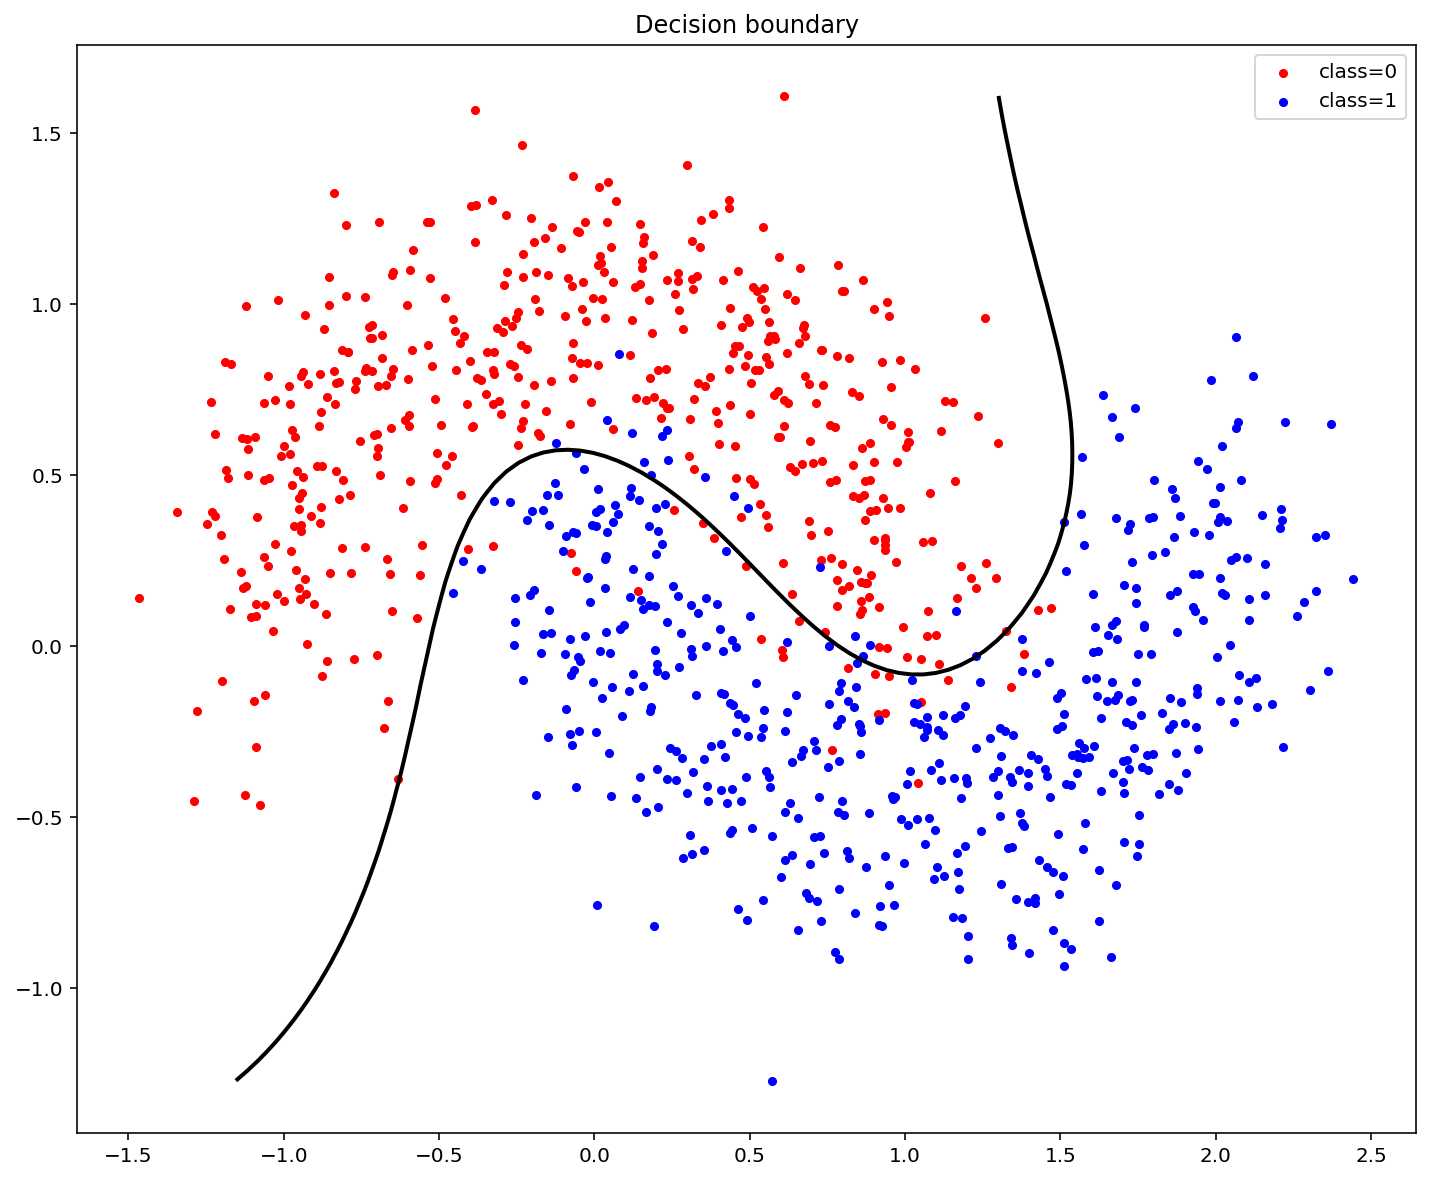

In [18]:
# compute values p(x) for multiple data points x
x1_min, x1_max = min(x1), max(x1) # min and max of grade 1
x2_min, x2_max = min(x2), max(x2) # min and max of grade 2
x1_coordinate = np.linspace(x1_min, x1_max, 100)
x2_coordinate = np.linspace(x2_min, x2_max, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(10):
            sum += w[k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = sum

# plot
plt.figure(4,figsize=(12,10))


plt.scatter(idx_class0[:,0], idx_class0[:,1] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(idx_class1[:,0], idx_class1[:,1], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary')
plt.show()

## 5. Plot the probability map
<hr>

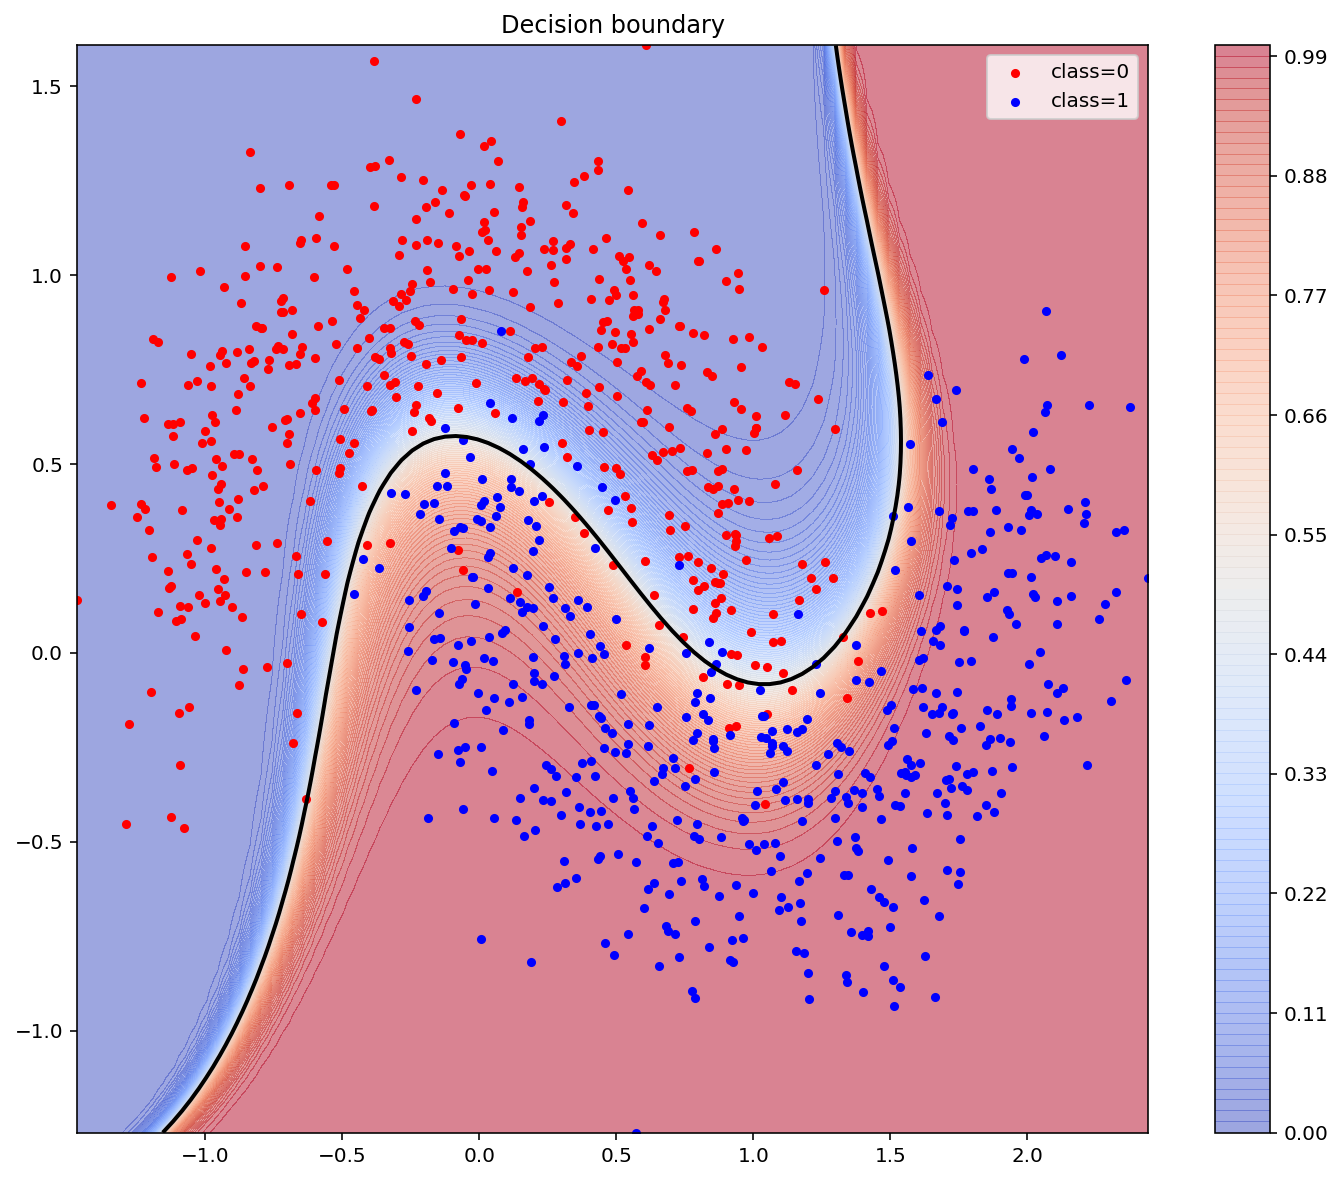

In [19]:
# compute values p(x) for multiple data points x
x1_min, x1_max = min(x1), max(x1) # min and max of grade 1
x2_min, x2_max = min(x2), max(x2) # min and max of grade 2
x1_coordinate = np.linspace(x1_min, x1_max, 100)
x2_coordinate = np.linspace(x2_min, x2_max, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2f = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(10):
            sum += w[k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2f[i,j] = sigmoid(sum)

# plot
fig = plt.figure(4,figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
ax = plt.contourf(xx1, xx2, np.transpose(X2f), cmap=cm.coolwarm, alpha=0.5, levels = np.arange(0, 1.01, 0.01))
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(idx_class0[:,0], idx_class0[:,1] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(idx_class1[:,0], idx_class1[:,1], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [20]:
def check_acc(y_pred, y):
    sum = 0
    for i in range(len(y)):
        if y[i] == 0 and y_pred[i] < 0.5:
            sum += 1
        if y[i] == 1 and y_pred[i] >= 0.5:
            sum += 1
    return sum / len(y)

In [21]:
# compute the accuracy of the classifier
n = data.shape[0]
p = f_pred(X, w)

print('total number of data', n)
print('total number of correctly classified data = ', check_acc(p, y) * len(y))
print('accuracy(%) = ', check_acc(p, y))

total number of data 1000
total number of correctly classified data =  954.0
accuracy(%) =  0.954


## Output using the dataset (dataset-noise-02.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

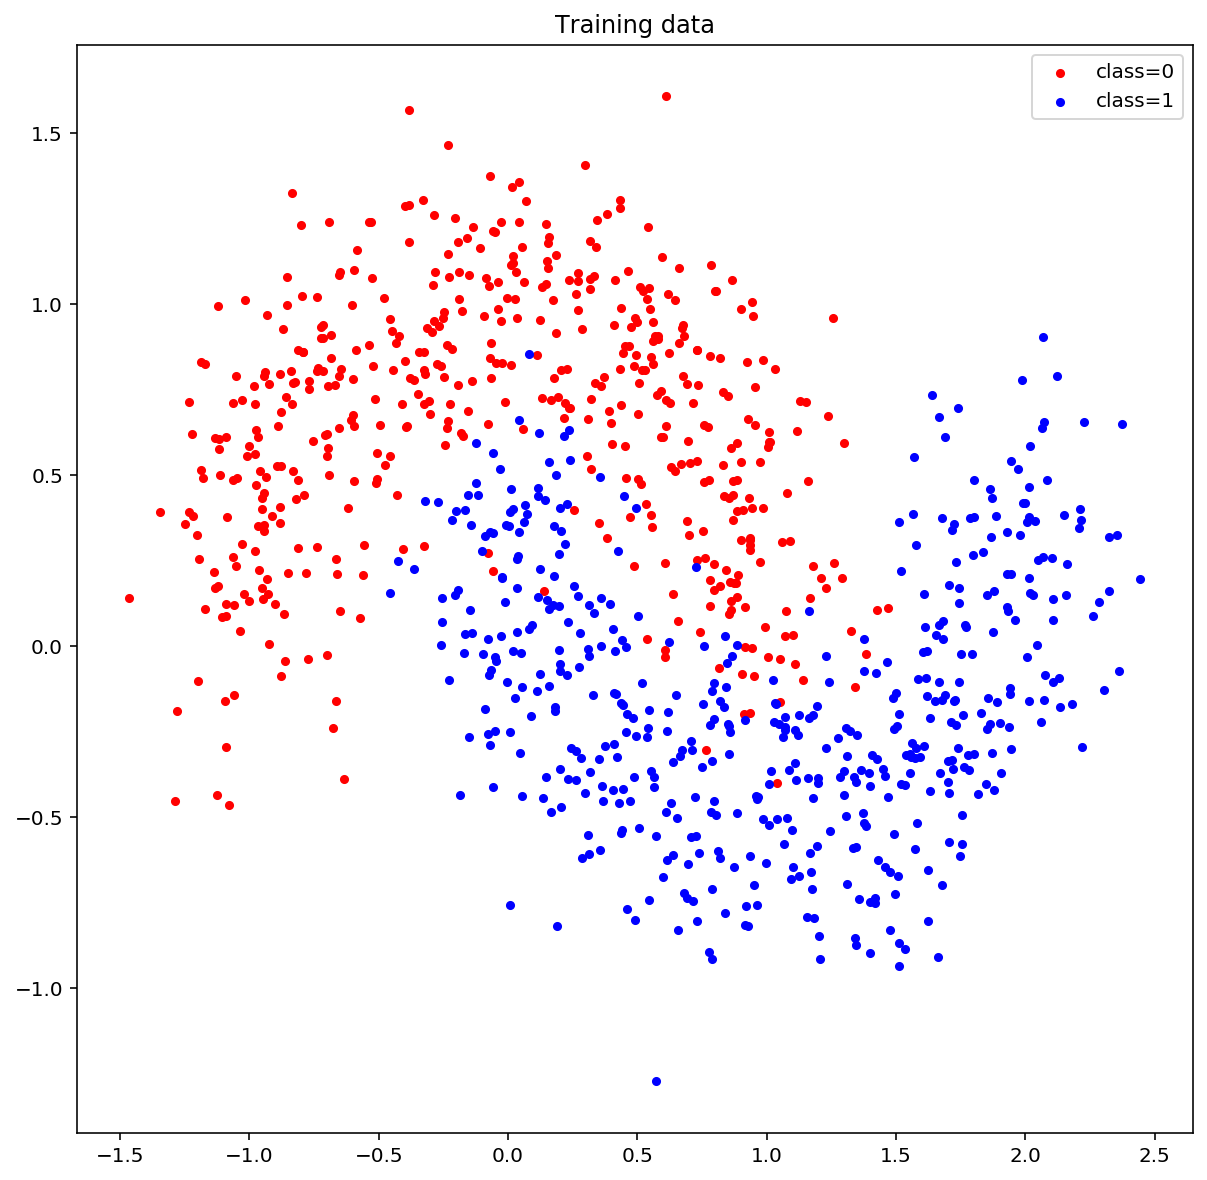

In [22]:
plt.figure(1,figsize=(10,10))
plt.scatter(idx_class0[:,0], idx_class0[:,1] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(idx_class1[:,0], idx_class1[:,1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

/Users/hong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


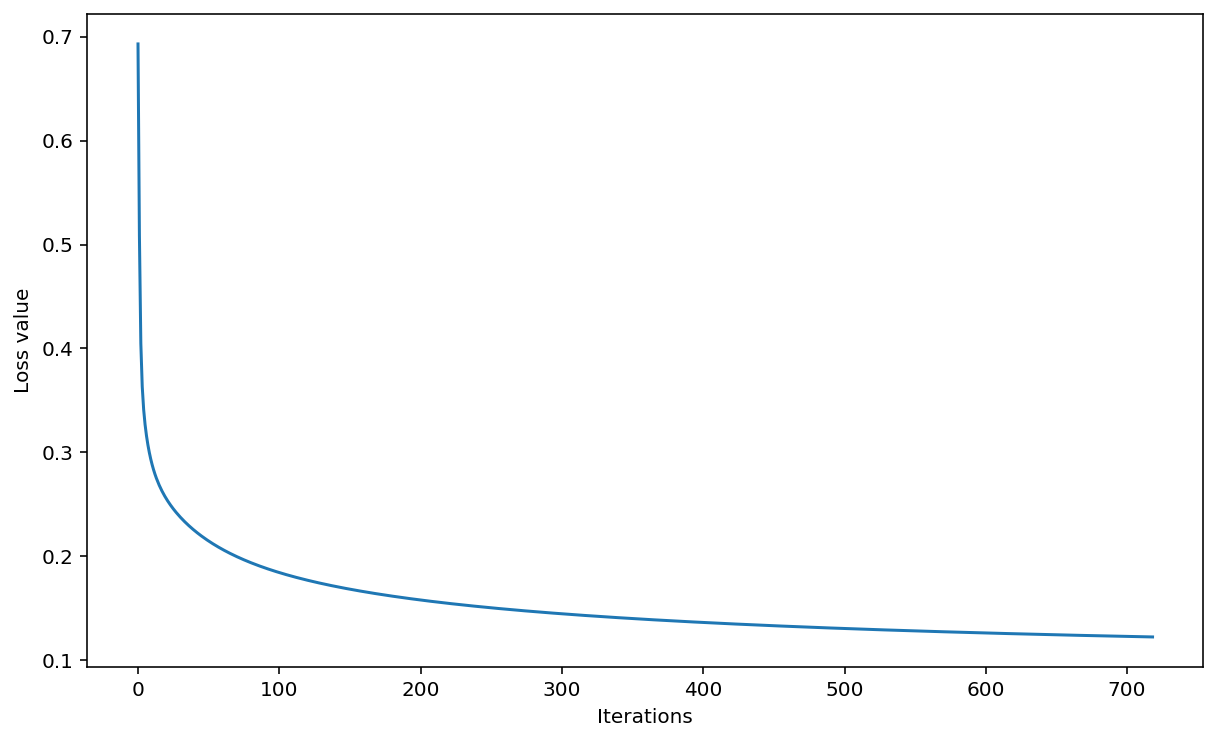

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

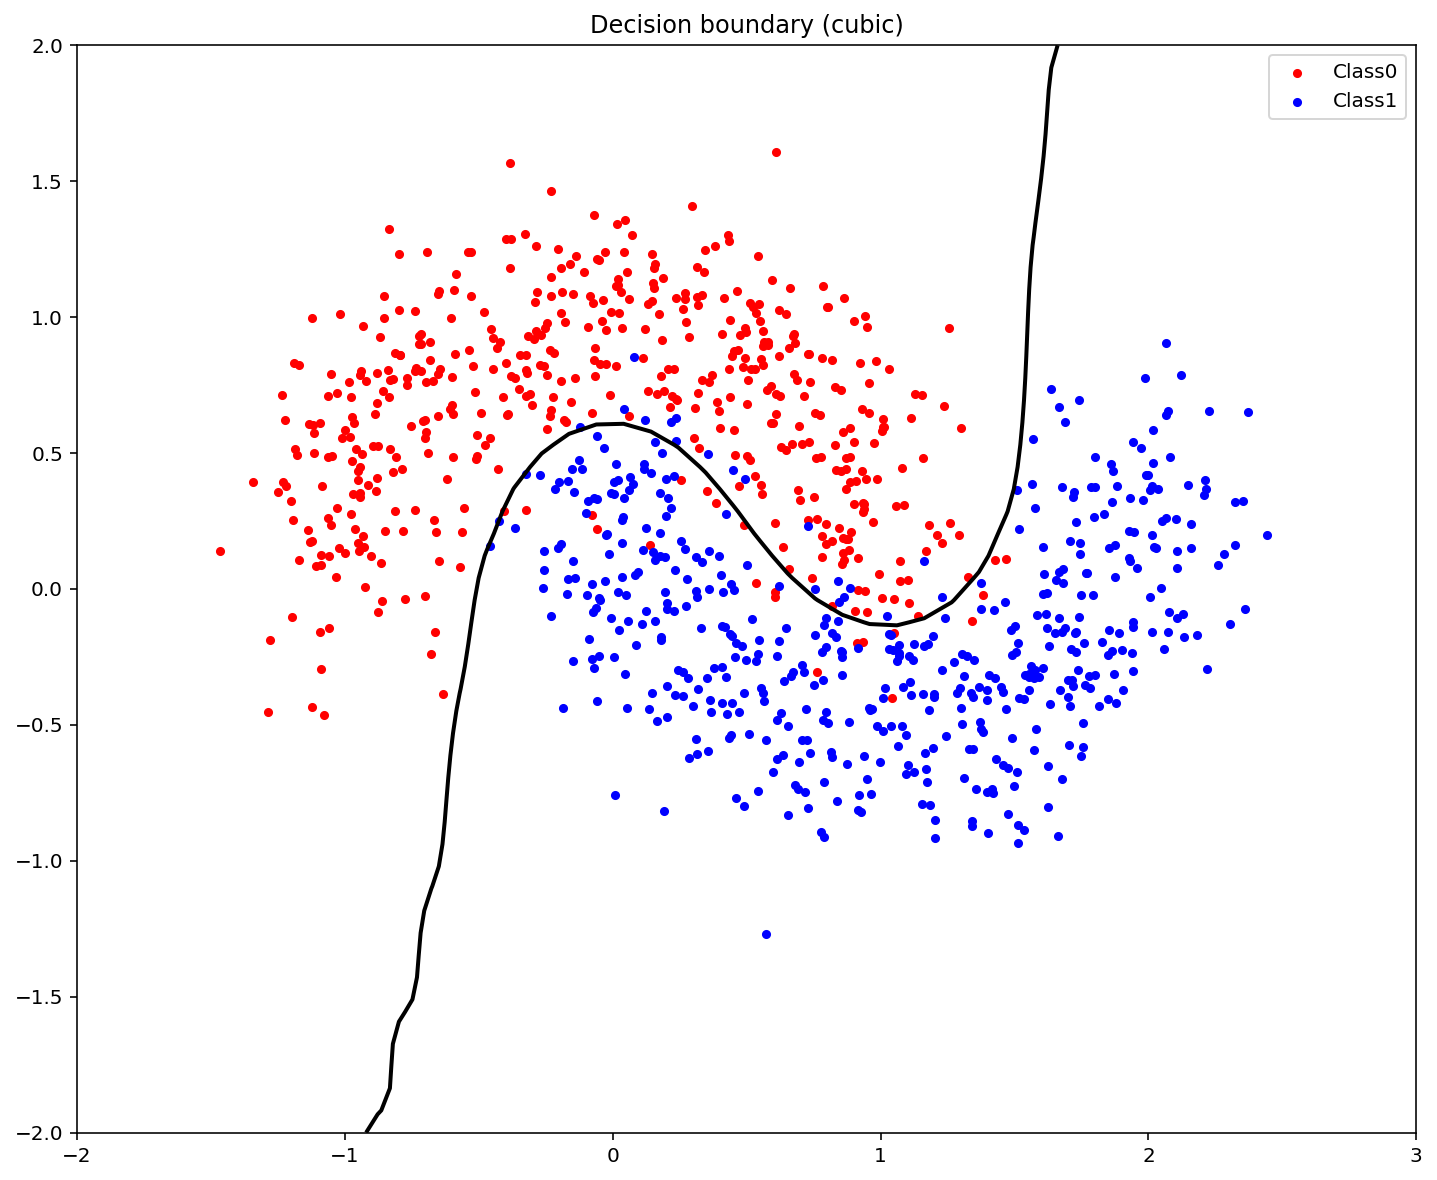

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

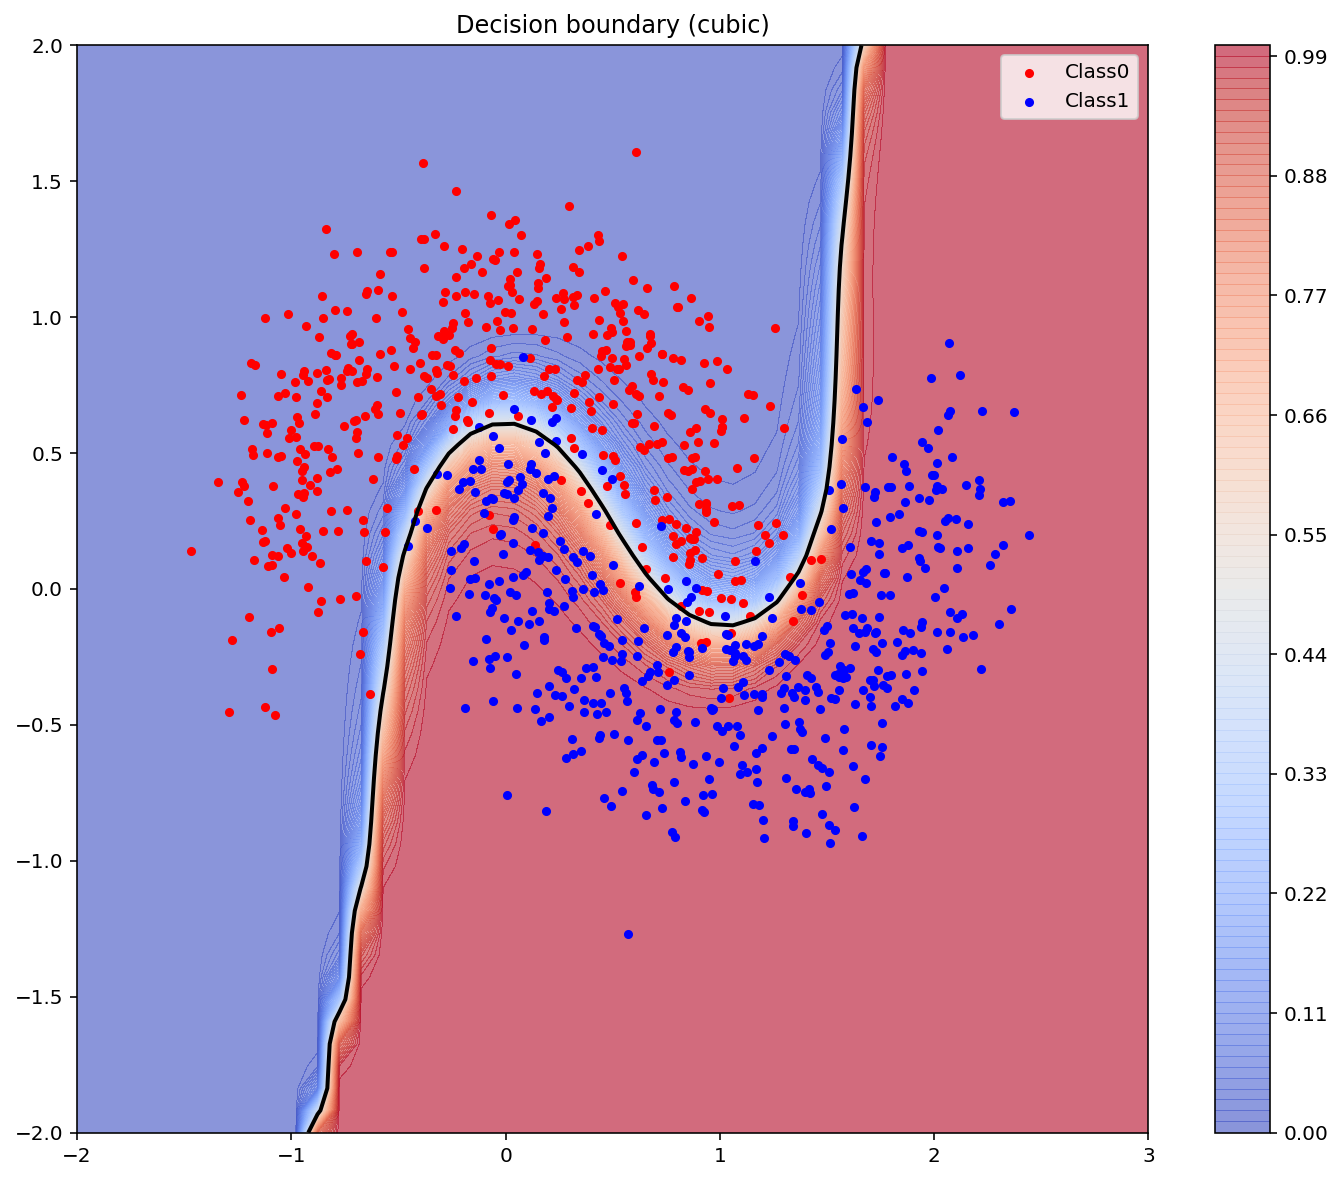

## 5. Compute the classification accuracy [1pt]
<hr>

total number of data = 1000
total number of correctly classified data =  960
accuracy(%) =  96.0
